In [2]:
import pandas as pd
import numpy as np
import matplotlib 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from statsmodels.stats.proportion import proportions_ztest
matplotlib.rc('font', family = 'Malgun Gothic')
matplotlib.rc('axes', unicode_minus=False) # 음수표시
warnings.filterwarnings('ignore') # 경고메시지 출력 제외
import scipy.stats as stats

import matplotlib.font_manager as fm

# 한글 폰트 설정 (Windows 기준, macOS 또는 Linux는 경로가 다를 수 있습니다)
font_path = 'C:/Windows/Fonts/malgun.ttf'  # Windows의 경우
font_prop = fm.FontProperties(fname=font_path)

plt.rcParams['font.family'] = font_prop.get_name()  # 전체 설정
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 처리

In [71]:
import pandas as pd

df = pd.read_csv('df_clean.csv')

df.head()

,위치,일시,현재발전출력,수평일사량1,수평일사량2,경사일사량1,경사일사량2,외기온도1,외기온도2,평균 풍속(m/s),평균기압(hPa),평균 상대습도(%),평균 기온(°C)
0,C,2016-01-01,466.916073,399.931800,111.610686,480.541403,191.603908,5.645956,-2.372171,6.5,1023.2,53.0,8.6
1,C,2016-01-02,462.048084,413.124592,184.873316,494.137144,398.508177,6.204298,-2.171323,9.2,1023.3,61.0,11.4
2,C,2016-01-03,481.714037,450.547333,1.794231,537.834034,0.933333,4.091682,-3.270690,4.6,1018.7,61.0,13.5
3,C,2016-01-04,445.589532,408.595023,130.497312,490.903517,164.789050,7.170962,-0.778970,6.6,1020.1,47.0,12.6
4,C,2016-01-05,300.211976,309.510464,176.789702,356.587164,348.965828,6.734510,-3.191605,6.1,1023.6,41.0,9.1


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10950 entries, 0 to 10949
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   위치          10950 non-null  object 
 1   일시          10950 non-null  object 
 2   현재발전출력      10950 non-null  float64
 3   수평일사량1      10950 non-null  float64
 4   수평일사량2      10950 non-null  float64
 5   경사일사량1      10950 non-null  float64
 6   경사일사량2      10950 non-null  float64
 7   외기온도1       10950 non-null  float64
 8   외기온도2       10950 non-null  float64
 9   평균 풍속(m/s)  10950 non-null  float64
 10  평균기압(hPa)   10950 non-null  float64
 11  평균 상대습도(%)  10950 non-null  float64
 12  평균 기온(°C)   10950 non-null  float64
dtypes: float64(11), object(2)
memory usage: 1.1+ MB


In [83]:
# 년도와 월 파생 변수 생성
# '일시' 컬럼을 datetime 형식으로 변환
df['일시'] = pd.to_datetime(df['일시'])
df['년도'] = df['일시'].dt.year
df['월'] = df['일시'].dt.month

In [85]:
df.head()

,위치,일시,현재발전출력,수평일사량1,수평일사량2,경사일사량1,경사일사량2,외기온도1,외기온도2,평균 풍속(m/s),평균기압(hPa),평균 상대습도(%),평균 기온(°C),년도,월
0,C,2016-01-01,466.916073,399.931800,111.610686,480.541403,191.603908,5.645956,-2.372171,6.5,1023.2,53.0,8.6,2016,1
1,C,2016-01-02,462.048084,413.124592,184.873316,494.137144,398.508177,6.204298,-2.171323,9.2,1023.3,61.0,11.4,2016,1
2,C,2016-01-03,481.714037,450.547333,1.794231,537.834034,0.933333,4.091682,-3.270690,4.6,1018.7,61.0,13.5,2016,1
3,C,2016-01-04,445.589532,408.595023,130.497312,490.903517,164.789050,7.170962,-0.778970,6.6,1020.1,47.0,12.6,2016,1
4,C,2016-01-05,300.211976,309.510464,176.789702,356.587164,348.965828,6.734510,-3.191605,6.1,1023.6,41.0,9.1,2016,1


In [87]:
# 월 컬럼에서 5, 6, 7을 제외한 나머지 월들 필터링
df_not567 = df[~df['월'].isin([5, 6, 7])]

In [89]:
df_not567[df_not567['월']==11]

,위치,일시,현재발전출력,수평일사량1,수평일사량2,경사일사량1,경사일사량2,외기온도1,외기온도2,평균 풍속(m/s),평균기압(hPa),평균 상대습도(%),평균 기온(°C),년도,월
1824,C,2020-11-01,35.060606,8.596667,74.966486,34.903509,86.885272,14.561915,13.918884,4.7,1020.6,60.0,18.3,2020,11
1825,C,2020-11-02,89.507256,33.222535,284.141090,116.651825,497.272880,13.760536,13.986408,5.4,1019.0,56.0,16.7,2020,11
1826,C,2020-11-03,223.437500,29.196203,182.739938,238.481355,276.070124,10.457074,7.866904,8.9,1018.2,45.0,12.4,2020,11
1827,C,2020-11-04,232.618635,31.952675,261.806897,241.518684,482.892915,9.593892,7.651068,6.5,1022.9,47.0,11.1,2020,11
1828,C,2020-11-05,150.834613,33.644068,214.068420,168.291304,362.409825,13.910488,10.122438,2.9,1022.9,48.0,14.4,2020,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10759,E,2016-11-26,16.738778,9.549107,56.425082,525.498408,1.410640,0.818265,18.422219,3.7,1022.5,50.0,9.7,2016,11
10760,E,2016-11-27,48.897337,385.043868,69.758924,483.965239,64.331698,4.604525,1.969028,7.5,1018.9,52.0,10.6,2016,11
10761,E,2016-11-28,187.125760,282.615096,62.100763,4.402655,35.716865,0.289154,0.250114,7.3,1023.4,52.0,9.1,2016,11
10762,E,2016-11-29,803.339326,197.562444,80.093112,487.196804,41.432356,1.620864,19.472697,7.6,1031.3,62.0,9.1,2016,11


In [91]:
df['위치'].value_counts()

위치
C    2190
A    2190
B    2190
D    2190
E    2190
Name: count, dtype: int64

In [93]:
df.columns

Index(['위치', '일시', '현재발전출력', '수평일사량1', '수평일사량2', '경사일사량1', '경사일사량2', '외기온도1',
       '외기온도2', '평균 풍속(m/s)', '평균기압(hPa)', '평균 상대습도(%)', '평균 기온(°C)', '년도',
       '월'],
      dtype='object')

                            OLS Regression Results                            
Dep. Variable:                 현재발전출력   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     44.64
Date:                Tue, 13 Aug 2024   Prob (F-statistic):           3.52e-87
Time:                        14:26:26   Log-Likelihood:                -77419.
No. Observations:                8190   AIC:                         1.549e+05
Df Residuals:                    8179   BIC:                         1.549e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.291e+04   7169.656      3.195      0.0

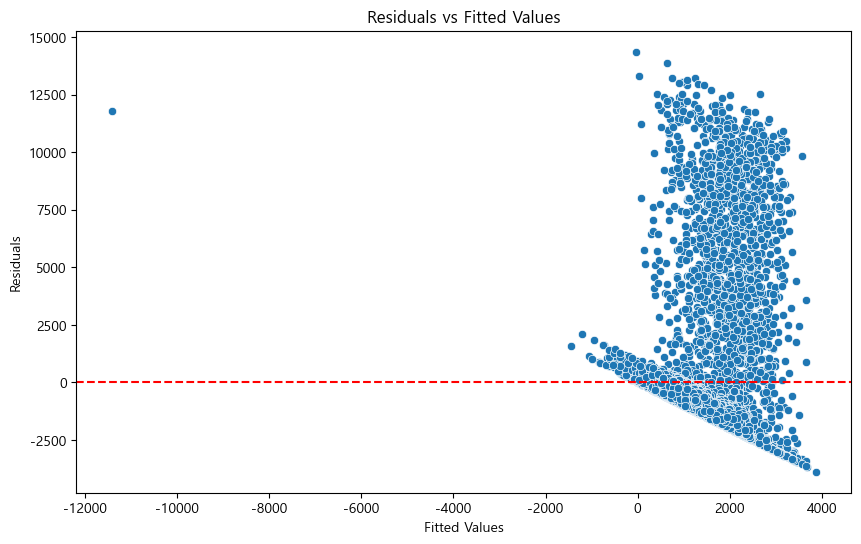

In [95]:
import statsmodels.api as sm

# 독립 변수와 종속 변수 정의
X = df_not567[['수평일사량1', '수평일사량2', '경사일사량1', '경사일사량2', '외기온도1',
        '외기온도2', '평균 풍속(m/s)', '평균기압(hPa)', '평균 상대습도(%)', '평균 기온(°C)']]
y = df_not567['현재발전출력']

# 상수항 추가
X = sm.add_constant(X)

# 회귀 모델 적합
model = sm.OLS(y, X).fit()

# 회귀 결과 출력
print(model.summary())

# 잔차 플롯
residuals = model.resid
fitted = model.fittedvalues

plt.figure(figsize=(10, 6))
sns.scatterplot(x=fitted, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

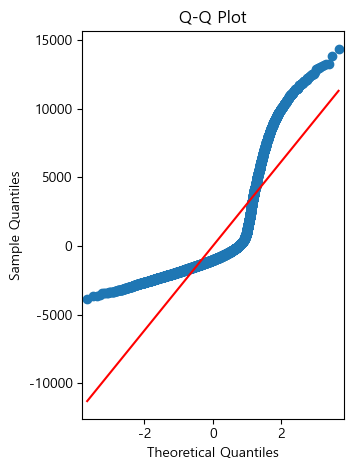


Variance Inflation Factors (VIF):
      Variable           VIF
0        const  44206.556583
1       수평일사량1      1.187139
2       수평일사량2      1.256395
3       경사일사량1      1.159388
4       경사일사량2      1.236656
5        외기온도1      1.345810
6        외기온도2      1.396820
7   평균 풍속(m/s)      1.188703
8    평균기압(hPa)      2.283993
9   평균 상대습도(%)      1.541090
10   평균 기온(°C)      2.351920


In [100]:
from statsmodels.stats.outliers_influence import variance_inflation_factor, OLSInfluence
# Q-Q 플롯
plt.subplot(1, 2, 2)
sm.qqplot(residuals, line='s', ax=plt.gca())
plt.title('Q-Q Plot')
plt.tight_layout()
plt.show()

# 다중 공선성 체크 (VIF)
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVariance Inflation Factors (VIF):")
print(vif_data)

In [77]:
df567 = df[df['월'].isin([5, 6, 7])]

In [79]:
df567.head()

,위치,일시,현재발전출력,수평일사량1,수평일사량2,경사일사량1,경사일사량2,외기온도1,외기온도2,평균 풍속(m/s),평균기압(hPa),평균 상대습도(%),평균 기온(°C),년도,월
720,C,2016-05-01,290.018219,341.819831,315.670528,350.384393,318.300717,16.556231,11.230715,9.6,1015.2,86.0,17.1,2016,5
721,C,2016-05-02,507.351442,553.911067,448.660135,579.805697,467.159453,18.196725,12.587148,5.9,1015.3,92.0,17.3,2016,5
722,C,2016-05-03,604.649813,629.810081,361.037283,667.249511,445.274165,20.855235,12.639616,13.6,1000.3,81.0,16.8,2016,5
723,C,2016-05-04,206.875190,247.325179,75.650250,259.018857,76.782522,19.882054,15.895356,12.4,1005.2,72.0,16.9,2016,5
724,C,2016-05-05,599.026969,604.546398,389.472811,649.044161,418.358754,25.829869,13.932047,4.9,1015.3,73.0,17.0,2016,5


                            OLS Regression Results                            
Dep. Variable:                 현재발전출력   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     37.81
Date:                Tue, 13 Aug 2024   Prob (F-statistic):           3.87e-70
Time:                        14:23:18   Log-Likelihood:                -25564.
No. Observations:                2760   AIC:                         5.115e+04
Df Residuals:                    2749   BIC:                         5.122e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.864e+04   1.22e+04      4.824      0.0

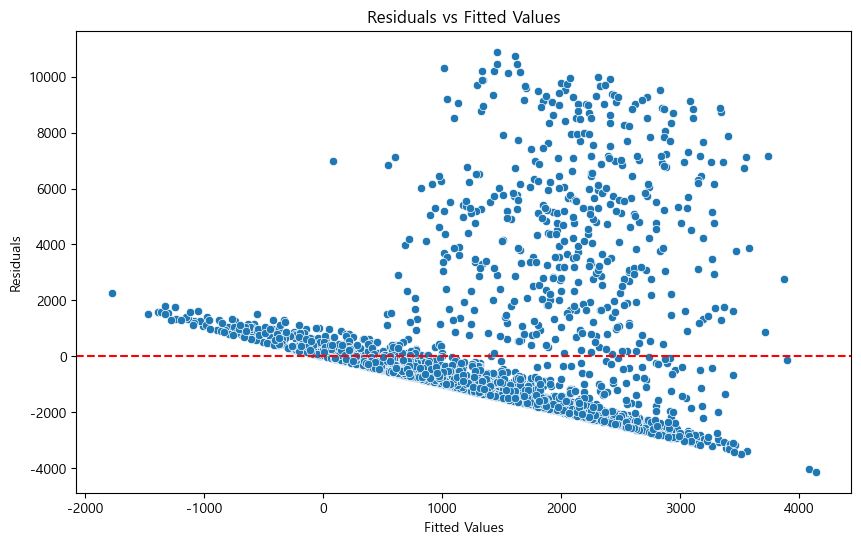

In [81]:
import statsmodels.api as sm

# 독립 변수와 종속 변수 정의
X = df567[['수평일사량1', '수평일사량2', '경사일사량1', '경사일사량2', '외기온도1',
        '외기온도2', '평균 풍속(m/s)', '평균기압(hPa)', '평균 상대습도(%)', '평균 기온(°C)']]
y = df567['현재발전출력']

# 상수항 추가
X = sm.add_constant(X)

# 회귀 모델 적합
model = sm.OLS(y, X).fit()

# 회귀 결과 출력
print(model.summary())

# 잔차 플롯
residuals = model.resid
fitted = model.fittedvalues

plt.figure(figsize=(10, 6))
sns.scatterplot(x=fitted, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

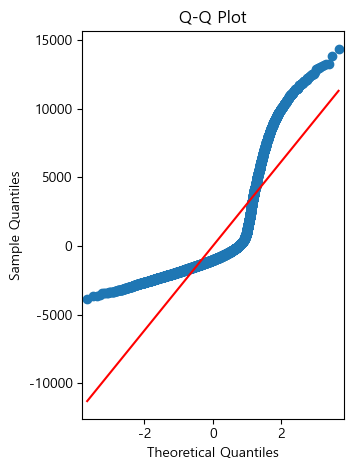


Variance Inflation Factors (VIF):
      Variable           VIF
0        const  44206.556583
1       수평일사량1      1.187139
2       수평일사량2      1.256395
3       경사일사량1      1.159388
4       경사일사량2      1.236656
5        외기온도1      1.345810
6        외기온도2      1.396820
7   평균 풍속(m/s)      1.188703
8    평균기압(hPa)      2.283993
9   평균 상대습도(%)      1.541090
10   평균 기온(°C)      2.351920


In [98]:
from statsmodels.stats.outliers_influence import variance_inflation_factor, OLSInfluence
# Q-Q 플롯
plt.subplot(1, 2, 2)
sm.qqplot(residuals, line='s', ax=plt.gca())
plt.title('Q-Q Plot')
plt.tight_layout()
plt.show()

# 다중 공선성 체크 (VIF)
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVariance Inflation Factors (VIF):")
print(vif_data)

                            OLS Regression Results                            
Dep. Variable:                 현재발전출력   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     62.31
Date:                Tue, 13 Aug 2024   Prob (F-statistic):          8.28e-124
Time:                        14:34:18   Log-Likelihood:            -1.0313e+05
No. Observations:               10950   AIC:                         2.063e+05
Df Residuals:                   10939   BIC:                         2.064e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.503e+04   5901.047      4.242      0.0

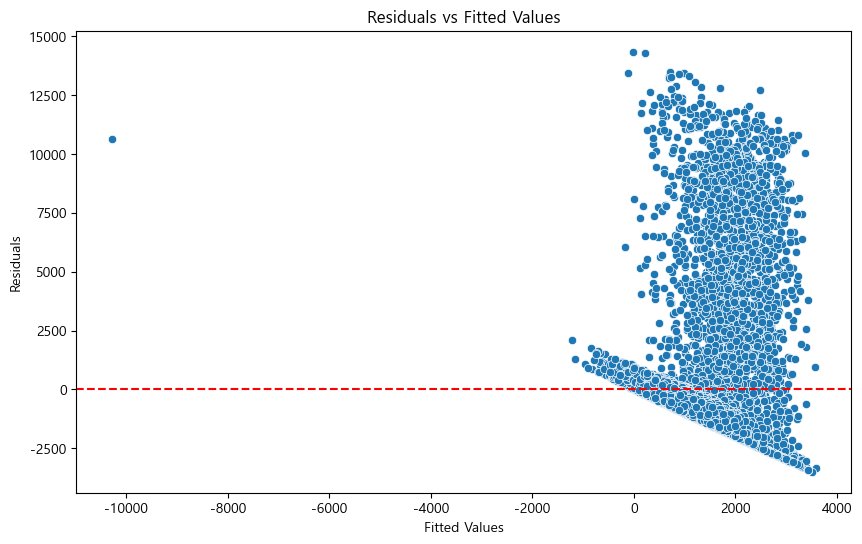

In [102]:
import statsmodels.api as sm

# 독립 변수와 종속 변수 정의
X = df[['수평일사량1', '수평일사량2', '경사일사량1', '경사일사량2', '외기온도1',
        '외기온도2', '평균 풍속(m/s)', '평균기압(hPa)', '평균 상대습도(%)', '평균 기온(°C)']]
y = df['현재발전출력']

# 상수항 추가
X = sm.add_constant(X)

# 회귀 모델 적합
model = sm.OLS(y, X).fit()

# 회귀 결과 출력
print(model.summary())

# 잔차 플롯
residuals = model.resid
fitted = model.fittedvalues

plt.figure(figsize=(10, 6))
sns.scatterplot(x=fitted, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

### 현재발전출력량 최적 조건 찾기
- 실패 값 이상하게 나옴

In [105]:
import statsmodels.api as sm

# 독립 변수 (일사량, 외기온도, 풍속, 기압, 습도, 기온)
X = df[['수평일사량1', '수평일사량2', '경사일사량1', '경사일사량2', '외기온도1',
        '외기온도2', '평균 풍속(m/s)', '평균기압(hPa)', '평균 상대습도(%)', '평균 기온(°C)']]

# 종속 변수 (현재발전출력)
y = df['현재발전출력']

# 상수항 추가
X = sm.add_constant(X)


In [107]:
# 회귀 모델 적합
model = sm.OLS(y, X).fit()

# 회귀 결과 출력
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 현재발전출력   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     62.31
Date:                Tue, 13 Aug 2024   Prob (F-statistic):          8.28e-124
Time:                        14:43:14   Log-Likelihood:            -1.0313e+05
No. Observations:               10950   AIC:                         2.063e+05
Df Residuals:                   10939   BIC:                         2.064e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.503e+04   5901.047      4.242      0.000    1.35e+04    3.66e+04
수평일사량1        -1.6123      0.192     -8.403      0.000      -1.988      -1.236
수평일사량2         1.1850      0.239      4.952      0.000       0.716       1.654
경사일사량1         0.4245      0.177      2.398      0.016       0.078       0.772
경사일사량2        -0.2959      0.201     -1.470      0.141      -0.690       0.099
외기온도1          2.1865      4.250      0.514      0.607      -6.145      10.518
외기온도2        -46.5628      4.582    -10.163      0.000     -55.544     -37.582
평균 풍속(m/s)  -146.3210     12.300    -11.896      0.000    -170.431    -122.211
평균기압(hPa)    -21.9315      5.650     -3.882      0.000     -33.006     -10.857
평균 상대습도(%)    12.5222      2.593      4.830      0.000       7.440      17.604
평균 기온(°C)    -61.1366      5.358    -11.410      0.000     -71.639     -50.634
==============================================================================
Omnibus:                     4886.077   Durbin-Watson:                   0.612
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19452.216
Skew:                           2.283   Prob(JB):                         0.00
Kurtosis:                       7.667   Cond. No.                     2.31e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [127]:
from scipy.optimize import minimize, Bounds

# 목적 함수 정의 (발전출력을 최대화)
def objective_function(params):
    x1, x2, x3, x4, x5, x6, x7, x8, x9, x10 = params
    return -(model.params['const'] + 
             model.params['x1'] * x1 +
             model.params['x2'] * x2 +
             model.params['x3'] * x3 +
             model.params['x4'] * x4 +
             model.params['x5'] * x5 +
             model.params['x6'] * x6 +
             model.params['x7'] * x7 +
             model.params['x8'] * x8 +
             model.params['x9'] * x9 +
             model.params['x10'] * x10)

# 변수 값에 대한 범위 설정 (예: 0 ~ 1000)
bounds = Bounds([0, 0, 0, 0, -10, -20, 0, 1000, 0, 0], 
                 [1000, 1000, 1000, 1000, 50, 50, 30, 1050, 100, 50])

# 초기값 설정
initial_guess = [400, 100, 500, 200, 10, 0, 5, 1015, 50, 20]

# 최적화 실행
result = minimize(objective_function, initial_guess, method='L-BFGS-B', bounds=bounds)

# 최적의 조건
optimal_params = result.x
print("최적의 조건:", optimal_params)


최적의 조건: [ 400.    0. 1000. 1000.  -10.   50.    0. 1000.    0.   50.]


In [129]:
df.columns

Index(['위치', '일시', '현재발전출력', '수평일사량1', '수평일사량2', '경사일사량1', '경사일사량2', '외기온도1',
       '외기온도2', '평균 풍속(m/s)', '평균기압(hPa)', '평균 상대습도(%)', '평균 기온(°C)', '년도',
       '월'],
      dtype='object')

In [131]:
# 최적의 조건
optimal_params = [400, 0, 1000, 1000, -10, 50, 0, 1000, 0, 50]

# 계산할 변수들
params_dict = {
    'const': model.params['const'],
    'x1': optimal_params[0],
    'x2': optimal_params[1],
    'x3': optimal_params[2],
    'x4': optimal_params[3],
    'x5': optimal_params[4],
    'x6': optimal_params[5],
    'x7': optimal_params[6],
    'x8': optimal_params[7],
    'x9': optimal_params[8],
    'x10': optimal_params[9]
}

# 발전출력 계산
predicted_output = (
    params_dict['const'] +
    model.params['x1'] * params_dict['x1'] +
    model.params['x2'] * params_dict['x2'] +
    model.params['x3'] * params_dict['x3'] +
    model.params['x4'] * params_dict['x4'] +
    model.params['x5'] * params_dict['x5'] +
    model.params['x6'] * params_dict['x6'] +
    model.params['x7'] * params_dict['x7'] +
    model.params['x8'] * params_dict['x8'] +
    model.params['x9'] * params_dict['x9'] +
    model.params['x10'] * params_dict['x10']
)

print(f"Predicted Output: {predicted_output}")


Predicted Output: -130639.61693583017


In [133]:
from scipy.optimize import minimize

# 제약 조건 정의
def constraint(params):
    수평일사량1, 수평일사량2, 경사일사량1, 경사일사량2, 외기온도1, 외기온도2, 풍속, 기압, 습도, 기온 = params
    return [
        수평일사량1 - 0,    # 수평일사량1 >= 0
        1000 - 수평일사량1,  # 수평일사량1 <= 1000
        수평일사량2 - 0,    # 수평일사량2 >= 0
        1000 - 수평일사량2,  # 수평일사량2 <= 1000
        경사일사량1 - 0,    # 경사일사량1 >= 0
        1000 - 경사일사량1,  # 경사일사량1 <= 1000
        경사일사량2 - 0,    # 경사일사량2 >= 0
        1000 - 경사일사량2,  # 경사일사량2 <= 1000
        외기온도1 - (-50),  # 외기온도1 >= -50
        외기온도1 - 50,     # 외기온도1 <= 50
        외기온도2 - (-50),  # 외기온도2 >= -50
        외기온도2 - 50,     # 외기온도2 <= 50
        풍속 - 0,           # 풍속 >= 0
        풍속 - 50,          # 풍속 <= 50
        기압 - 900,         # 기압 >= 900
        기압 - 1100,        # 기압 <= 1100
        습도 - 0,           # 습도 >= 0
        습도 - 100,         # 습도 <= 100
        기온 - (-50),       # 기온 >= -50
        기온 - 50          # 기온 <= 50
    ]

# 최적화 실행
result = minimize(objective_function, initial_guess, method='SLSQP', constraints={'type': 'ineq', 'fun': constraint})

# 최적의 조건
optimal_params = result.x
print("최적의 조건:", optimal_params)


최적의 조건: [ 4.00000000e+02  3.45165989e+07 -1.98082443e+08  1.05828218e+07
  4.42901514e+19  4.89861722e+24  1.34879744e+19  3.01044537e+19
  1.37459875e+19  3.38821954e+25]


In [135]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from sklearn.preprocessing import StandardScaler

# 데이터 전처리
X = df[['수평일사량1', '수평일사량2', '경사일사량1', '경사일사량2', '외기온도1',
        '외기온도2', '평균 풍속(m/s)', '평균기압(hPa)', '평균 상대습도(%)', '평균 기온(°C)']]
y = df['현재발전출력']

# 스케일링
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

# 상수항 추가
X_scaled = sm.add_constant(X_scaled)

# 회귀 모델 적합
model = sm.OLS(y, X_scaled).fit()

# 목적 함수 정의 (발전출력을 최대화)
def objective_function(params):
    scaled_params = scaler_X.transform([params[1:]])[0]  # 스케일링 적용
    return -(model.params['const'] + 
             model.params['x1'] * scaled_params[0] +
             model.params['x2'] * scaled_params[1] +
             model.params['x3'] * scaled_params[2] +
             model.params['x4'] * scaled_params[3] +
             model.params['x5'] * scaled_params[4] +
             model.params['x6'] * scaled_params[5] +
             model.params['x7'] * scaled_params[6] +
             model.params['x8'] * scaled_params[7] +
             model.params['x9'] * scaled_params[8] +
             model.params['x10'] * scaled_params[9])

# 제약 조건 정의
def constraint(params):
    return [
        params[1] - 0,    # 수평일사량1 >= 0
        1000 - params[1],  # 수평일사량1 <= 1000
        params[2] - 0,    # 수평일사량2 >= 0
        1000 - params[2],  # 수평일사량2 <= 1000
        params[3] - 0,    # 경사일사량1 >= 0
        1000 - params[3],  # 경사일사량1 <= 1000
        params[4] - 0,    # 경사일사량2 >= 0
        1000 - params[4],  # 경사일사량2 <= 1000
        params[5] - (-50),  # 외기온도1 >= -50
        params[5] - 50,     # 외기온도1 <= 50
        params[6] - (-50),  # 외기온도2 >= -50
        params[6] - 50,     # 외기온도2 <= 50
        params[7] - 0,     # 풍속 >= 0
        params[7] - 50,    # 풍속 <= 50
        params[8] - 900,   # 기압 >= 900
        params[8] - 1100,  # 기압 <= 1100
        params[9] - 0,     # 습도 >= 0
        params[9] - 100,   # 습도 <= 100
        params[10] - (-50),  # 기온 >= -50
        params[10] - 50    # 기온 <= 50
    ]

# 초기값 설정 (스케일링된 범위 내에서)
initial_guess = [0, 400, 1000, 500, 200, 10, 0, 5, 1015, 50, 20]

# 최적화 실행
result = minimize(objective_function, initial_guess, method='SLSQP', constraints={'type': 'ineq', 'fun': constraint})

# 최적의 조건
optimal_params = result.x
print("최적의 조건:", optimal_params)


최적의 조건: [ 0.00000000e+00  4.17433280e+07  3.15466376e+02 -4.77862035e+07
 -3.23373926e+06  1.73729129e+25  6.18884105e+18  3.93835296e+18
  7.21193232e+18  6.55321970e+25  1.71671551e+18]


### 지역별 온도에따른 현재발전출력

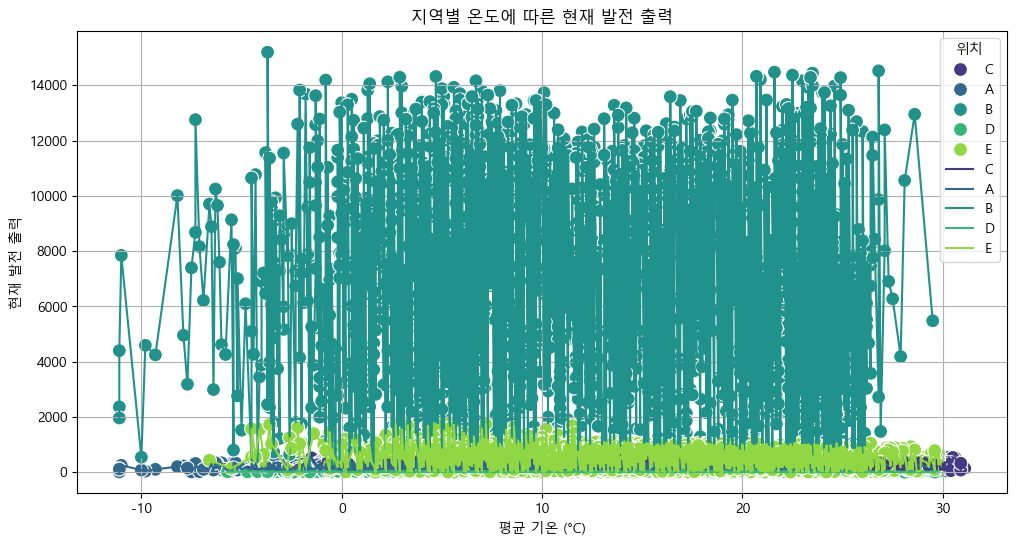

In [141]:
# 지역별 평균 기온과 발전 출력의 관계 시각화
plt.figure(figsize=(12, 6))

# 각 지역에 대한 산점도와 회귀선 추가
sns.scatterplot(data=df, x='평균 기온(°C)', y='현재발전출력', hue='위치', palette='viridis', s=100)
sns.lineplot(data=df, x='평균 기온(°C)', y='현재발전출력', hue='위치', palette='viridis', estimator=None, markers='o')

plt.title('지역별 온도에 따른 현재 발전 출력')
plt.xlabel('평균 기온 (°C)')
plt.ylabel('현재 발전 출력')
plt.legend(title='위치')
plt.grid(True)
plt.show()